In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib as plt
%matplotlib inline

In [8]:
train = pd.read_csv("train.csv", index_col="row_id", dtype={'x':np.float32,'y':np.float32,'accuracy':np.int32,
                                                            'time':np.int32})

In [4]:
train.describe()

,x,y,accuracy,time,place_id
count,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07
mean,4.999770e+00,5.001814e+00,8.284912e+01,4.170104e+05,5.493787e+09
std,2.857601e+00,2.887505e+00,1.147518e+02,2.311761e+05,2.611088e+09
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000016e+09
25%,2.534700e+00,2.496700e+00,2.700000e+01,2.030570e+05,3.222911e+09
50%,5.009100e+00,4.988300e+00,6.200000e+01,4.339220e+05,5.518573e+09
75%,7.461400e+00,7.510300e+00,7.500000e+01,6.204910e+05,7.764307e+09
max,1.000000e+01,1.000000e+01,1.033000e+03,7.862390e+05,9.999932e+09


In [5]:
test = pd.read_csv('test.csv', index_col="row_id")

In [6]:
test.describe()

,x,y,accuracy,time
count,8.607230e+06,8.607230e+06,8.607230e+06,8.607230e+06
mean,4.991417e+00,5.006705e+00,9.265208e+01,8.904637e+05
std,2.866409e+00,2.886888e+00,1.242906e+02,6.446783e+04
min,0.000000e+00,0.000000e+00,1.000000e+00,7.862420e+05
25%,2.517000e+00,2.502400e+00,4.200000e+01,8.332200e+05
50%,4.988000e+00,5.000900e+00,6.400000e+01,8.874620e+05
75%,7.463600e+00,7.505300e+00,7.900000e+01,9.454910e+05
max,1.000000e+01,1.000000e+01,1.026000e+03,1.006589e+06


# Initial thoughts
Neighest Neighbor approach
Possibly custom algorithm, but first need to read up on NN algorithms
When considering NN, need to weight contribution somehow by the accuracy of the neighbors. For example, less accurate distant neighbor may have more weight than a more accurate neightbor at the same distance.

The cross-validation set should be broken up by places.

Each test point will have: x, y, accuracy, and time
The set of checkins will have: x, y, accuracy, time, and place
Now we make make some relationships between these:
* relative distance
* probability the distance is consistent given the accuracy of the two
* probability the test time is from the distribution of checkin times for place

A separate datastructor can characterize the checkin times for each place. Maybe some kind of distribution that we can use to compute the probability mentioned above.

Alternative idea:
Create a type of heatmap in 3D with dimensions: x, y, & time
For each training point, distribute 1 across space and time.
Then normalize the heatmap by dividing by the total number of points.

In [7]:
train.head()

,x,y,accuracy,time,place_id
row_id,,,,,
0,0.7941,9.0809,54,470702,8523065625
1,5.9567,4.7968,13,186555,1757726713
2,8.3078,7.0407,74,322648,1137537235
3,7.3665,2.5165,65,704587,6567393236
4,4.0961,1.1307,31,472130,7440663949


In [8]:
train.groupby('place_id').size().describe()

count    108390.000000
mean        268.641212
std         267.944598
min           1.000000
25%          98.000000
50%         163.000000
75%         333.000000
max        1849.000000
dtype: float64

place_id 1173844761


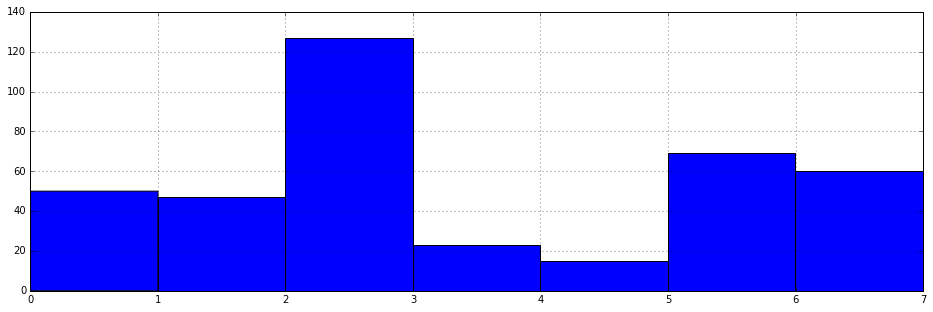

In [45]:
random_placeid = train.place_id.sample().values[0]
print("place_id",random_placeid)
plt.rcParams['figure.figsize'] = 16, 5
week = (train[train.place_id == random_placeid].time % 10080) / 1440
# day = (train[train.place_id == random_placeid].time % 1440) / 60
week.hist(bins=7)
# day.hist(bins=12)

In [12]:
sorted_train = train.sort_values('time', axis=0)

In [13]:
sorted_train.info()
















<class 'pandas.core.frame.DataFrame'>
Int64Index: 29118021 entries, 15280869 to 11015770
Data columns (total 5 columns):
x           float32
y           float32
accuracy    int32
time        int32
place_id    int64
dtypes: float32(2), int32(2), int64(1)
memory usage: 888.6 MB


In [15]:
sorted_train.to_pickle("train.df")

In [16]:
sorted_train.head()

,x,y,accuracy,time,place_id
row_id,,,,,
15280869,2.9374,1.0010,433,1,7186804346
23020268,5.3673,5.6998,25,1,7449653826
3977976,3.1148,3.6161,8,1,8090429732
27743788,3.7725,6.4504,65,2,4115006237
3836334,3.5102,3.6296,8,3,8090429732
